In [2]:
import  pandas  as  pd 
#settings : 
pd.set_option ( 'display.max_rows' ,  1000 ) 
pd.set_option ( 'display.max_columns' ,  500 ) 
pd.set_option ( 'display.width' ,  1000 ) 
pd.set_option ( 'display.max_colwidth' ,  1000 )
import  numpy  as  np 
import  matplotlib.pyplot  as  plt 
import  seaborn  as  sns
import missingno as msno 
import datatable as dt 
!pip install datatable   

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable


In [3]:
data_3 = pd.read_csv("diabetes.csv")

In [4]:
y = data_3['Outcome']

In [6]:
data_3['Age'].fillna(data_3.groupby('Outcome')['Age'].transform('median'), inplace = True)
data_3['BloodPressure'].fillna(data_3.groupby('Outcome')['BloodPressure'].transform('median'), inplace = True)
data_3['Insulin'].fillna(data_3.groupby('Outcome')['Insulin'].transform('median'), inplace = True)
data_3['DiabetesPedigreeFunction'].fillna(data_3.groupby('Outcome')['DiabetesPedigreeFunction'].transform('median'), inplace = True)
data_3['BMI'].fillna(data_3.groupby('Outcome')['BMI'].transform('median'), inplace = True)

In [7]:
X_minMaxs = data_3[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
X_norm = data_3[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
X_std = data_3[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
X_Nothing = data_3[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

In [8]:
from sklearn.preprocessing import minmax_scale
X_minMaxs = minmax_scale(X_minMaxs)

In [9]:
#split minMax
from sklearn.model_selection import train_test_split
X_train_minMaxs, X_test_minMaxs, y_train_minMaxs, y_test_minMaxs = train_test_split(X_minMaxs, y, test_size=0.3)

In [10]:
from sklearn.linear_model  import LogisticRegression
model_minmax = LogisticRegression( max_iter=500)
model_minmax.fit(X_train_minMaxs,y_train_minMaxs )
pred_minmax = model_minmax.predict(X_test_minMaxs)

In [11]:
#split norma
from sklearn.preprocessing import normalize
X_norm = normalize(X_norm)

In [12]:
#split norna
from sklearn.model_selection import train_test_split
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y, test_size=0.3)

In [13]:
from sklearn.linear_model  import LogisticRegression
model_norm = LogisticRegression( max_iter=500)
model_norm.fit(X_train_norm, y_train_norm)
pred_norm = model_norm.predict(X_test_norm)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_std = sc_X.fit_transform(X_std)


In [14]:
from sklearn.model_selection import train_test_split
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y, test_size=0.3)

In [15]:
from sklearn.linear_model  import LogisticRegression
model_std = LogisticRegression( max_iter=500)
model_std.fit(X_train_std, y_train_std)
pred_std = model_std.predict(X_test_std)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Nothing, y, test_size=0.3)

In [17]:
from sklearn.linear_model  import LogisticRegression
model_nothing = LogisticRegression(max_iter=500)
model_nothing.fit(X_train,y_train)
pred_nothing  = model_nothing.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
print ('R Squared MIXMAX =',accuracy_score(y_test_minMaxs, pred_minmax))

print ('R Squared NORM =',accuracy_score(y_test_norm, pred_norm))

print ('R Squared std  =',accuracy_score(y_test_std, pred_std))
print ('R Squared Nothing =',accuracy_score(y_test, pred_nothing))

R Squared MIXMAX = 0.7878787878787878
R Squared NORM = 0.6666666666666666
R Squared std  = 0.7619047619047619
R Squared Nothing = 0.7359307359307359


In [19]:
X_minMaxs2 = data_3[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
X_norm2 = data_3[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
X_std2 = data_3[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

In [20]:
X_feature = X_std2.columns.to_list()

In [21]:
#split minMax
from sklearn.model_selection import train_test_split
X_train_minMaxs2, X_test_minMaxs2, y_train_minMaxs2, y_test_minMaxs2 = train_test_split(X_minMaxs2, y, test_size=0.3)

In [22]:
from sklearn.preprocessing import minmax_scale
X_train_minMaxs2 = minmax_scale(X_train_minMaxs2)
X_train_minMaxs2 = pd.DataFrame(X_train_minMaxs2, columns=X_feature )

In [23]:
from sklearn.linear_model  import LogisticRegression
model_minmax2 = LogisticRegression(max_iter=500)
model_minmax2.fit(X_train_minMaxs2 ,y_train_minMaxs2)
pred_minmax2 = model_minmax.predict(X_test_minMaxs2.values)

In [24]:
#split norna
from sklearn.model_selection import train_test_split
X_train_norm2, X_test_norm2, y_train_norm2, y_test_norm2 = train_test_split(X_norm2, y, test_size=0.3)

In [25]:
#split norma
from sklearn.preprocessing import normalize
X_train_norm2 = normalize(X_train_norm2)

In [26]:
from sklearn.linear_model  import LogisticRegression
model_norm2 = LogisticRegression(max_iter=500)
model_norm2.fit(X_train_norm2, y_train_norm2)
pred_norm2 = model_norm2.predict(X_test_norm2.values)

In [27]:
from sklearn.model_selection import train_test_split
X_train_std2, X_test_std2, y_train_std2, y_test_std2 = train_test_split(X_std2, y, test_size=0.3)

In [28]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_std = sc_X.fit_transform(X_train_std2)

In [29]:
from sklearn.linear_model  import LogisticRegression
model_std2 = LogisticRegression( max_iter=500)
model_std2.fit(X_train_std2, y_train_std2)
pred_std2 = model_std2.predict(X_test_std2)

In [30]:
from sklearn.metrics import accuracy_score
print ('R Squared MIXMAX =',accuracy_score(y_test_minMaxs, pred_minmax))

print ('R Squared NORM =',accuracy_score(y_test_norm, pred_norm))

print ('R Squared std  =',accuracy_score(y_test_std, pred_std))
print ('R Squared Nothing =',accuracy_score(y_test, pred_nothing))
print ('R Squared MIXMAX without scaling the test data =',accuracy_score(y_test_minMaxs2, pred_minmax2))
print ('R Squared NORM without scaling the test data =',accuracy_score(y_test_norm2, pred_norm2))
print ('R Squared Std without scaling the test data =',accuracy_score(y_test_std2, pred_std2))

R Squared MIXMAX = 0.7878787878787878
R Squared NORM = 0.6666666666666666
R Squared std  = 0.7619047619047619
R Squared Nothing = 0.7359307359307359
R Squared MIXMAX without scaling the test data = 0.33766233766233766
R Squared NORM without scaling the test data = 0.6536796536796536
R Squared Std without scaling the test data = 0.7402597402597403


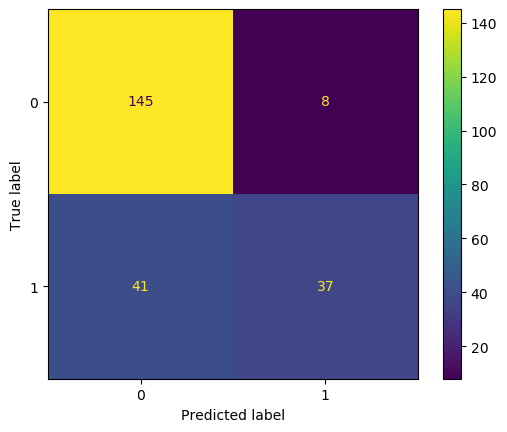

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test_minMaxs, pred_minmax)

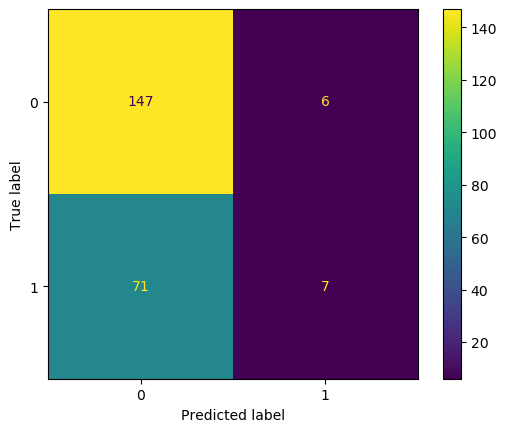

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test_norm, pred_norm)

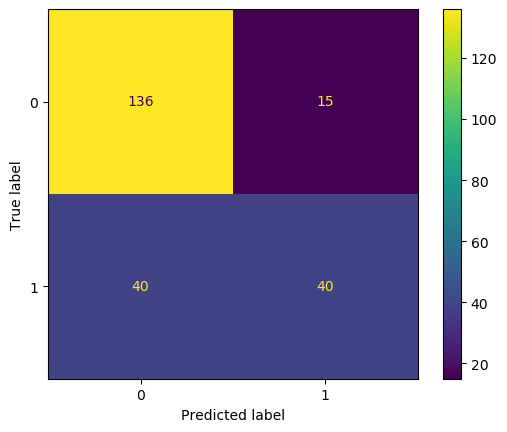

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test_std, pred_std)

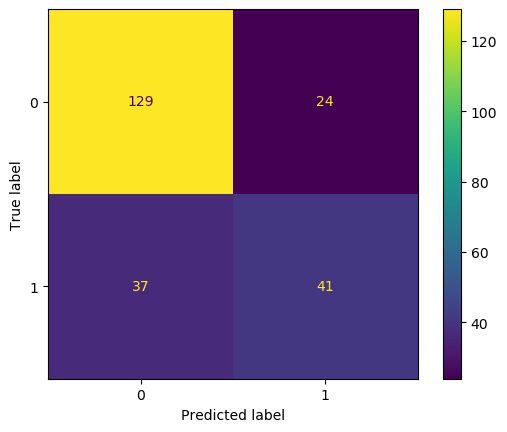

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_nothing)

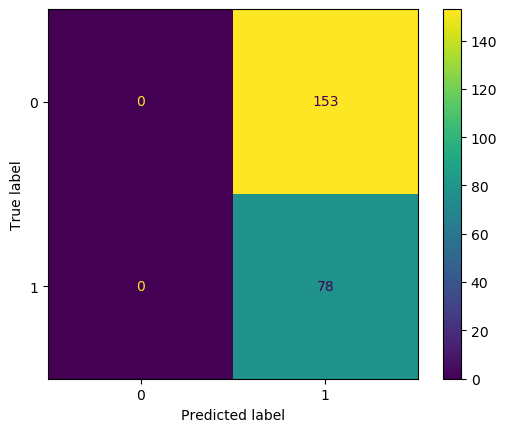

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test_minMaxs2, pred_minmax2)

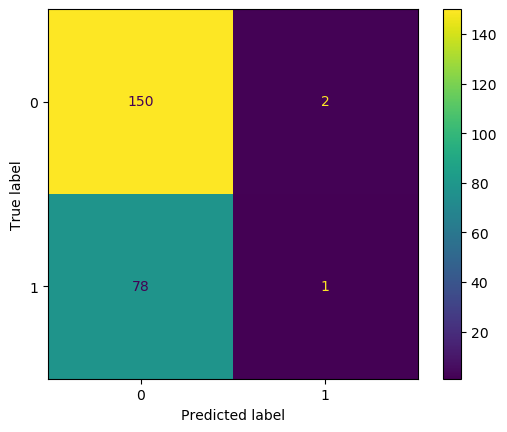

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test_norm2, pred_norm2)

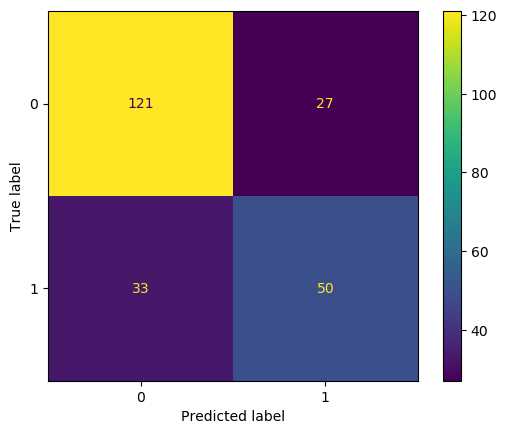

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test_std2, pred_std2)

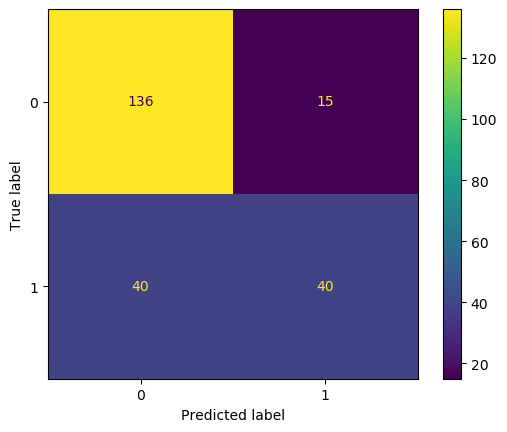

In [38]:
ConfusionMatrixDisplay.from_predictions(y_test_std, pred_std)